In [1]:

# Cell 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cell 3: Load Datasets
# Update file paths to your local directory
train_df = pd.read_csv(r'D:\Aditya\IITG C and A\Train_Data.csv')
test_df = pd.read_csv(r'D:\Aditya\IITG C and A\Test_Data.csv')


print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()


Train shape: (1966, 9)
Test shape: (312, 8)


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [3]:
# Cell 4: Preprocessing and Encoding
label_map = {'Adult': 0, 'Senior': 1}
train_df['age_group'] = train_df['age_group'].map(label_map)

# Drop rows with missing target
train_df = train_df.dropna(subset=['age_group'])

# Feature selection
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(train_df[features])
y = train_df['age_group'].astype(int)

X_test = imputer.transform(test_df[features])


In [4]:
# Cell 5: Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)


RandomForestClassifier(random_state=42)

In [5]:
# Cell 6: Prediction and Submission
test_preds = clf.predict(X_test)

submission_df = pd.DataFrame({'age_group': test_preds})
submission_df.to_csv('submission.csv', index=False)

submission_df.head()


,age_group
0,0
1,0
2,0
3,0
4,0


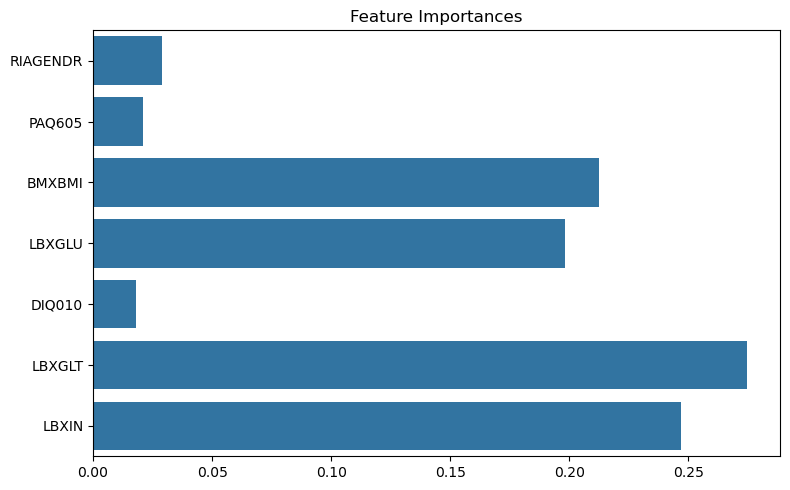

In [6]:
# Cell 7: Feature Importance
importances = clf.feature_importances_
feature_names = features

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [7]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif 18.5 <= bmi < 25:
        return 1  # Healthy
    elif 25 <= bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

train_df['BMI_Category'] = train_df['BMXBMI'].apply(bmi_category)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_val = clf.predict(X_val)

print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


[[340   0]
 [  1  50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      0.98      0.99        51

    accuracy                           1.00       391
   macro avg       1.00      0.99      0.99       391
weighted avg       1.00      1.00      1.00       391



In [10]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.8593
Logistic Regression Accuracy: 0.8645


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8261


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation accuracy scores: [0.83887468 0.83887468 0.84615385 0.83589744 0.82564103]
Mean CV accuracy: 0.8370883336612238


In [16]:
import pandas as pd

# ✅ Step 1: Predict on test data
predictions = model.predict(X_test)

# ✅ Step 2: Ensure predictions are binary (0 or 1)
# (If your model gives probabilities, round or threshold them)
# Example for logistic regression or probability-based models:
# predictions = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

# ✅ Step 3: Create submission DataFrame
submission = pd.DataFrame({
    'age_group': predictions  # Must match sample-submission format
})

# ✅ Step 4: Save to CSV (no index)
submission.to_csv("submission.csv", index=False)

print("✅ submission.csv file created successfully!")


✅ submission.csv file created successfully!
